<a href="https://colab.research.google.com/github/bernardobdp/SIM_YAC_PRUDENTE_UPSE2023/blob/main/difusividad2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#sumulador ecuacion de la difusividad

In [11]:
import numpy as np
import math
L=1000
dx=10
distance=np.arange(0,L+1,dx)
P01=np.ones_like(distance)
print(P01)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [38]:
distance.shape

(101,)

In [26]:
Pyac=4000
Pfrontd=0
Pfronti=0
tiempo=10000
DT=10
VectorTiempo=np.arange(0,math.floor(tiempo/DT)*DT,DT)
PXX=np.zeros((math.floor(tiempo/DT),len(distance)))

Pdt=np.zeros_like(distance)

In [27]:
PXX.shape

(1000, 101)

In [28]:
P01=np.ones_like(distance)
P01=P01*Pyac
P01[0]=Pfronti
P01[len(P01)-1]=Pfrontd
P0in=P01
Pdt=P01
t=DT

In [29]:
print(P01)

[   0 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000
 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000
 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000
 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000
 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000
 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000
 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000
 4000 4000    0]


In [30]:
def Presdt(P1,P2,P3,deltat,deltax):
  return(((P1-2*P2+P3)/(deltax*deltax))*deltat)+P2

In [31]:
PXX[0]=P01
while t<tiempo:
     for i in range(0,len(P0in)-1):
       if i==0:
         Pdt[i]=P0in[0]
       elif i==len(P0in)-1:
         Pdt[i]=P0in[len(P0in)-1]
       else:
         Pdt[i]=Presdt(P0in[i-1],P0in[i],P0in[i+1],DT,dx)
         PXX[math.floor(t/DT)]=Pdt
    
     t=t+DT
     P0in=Pdt
     P01=np.append(P01,Pdt)

In [33]:
PXX

array([[   0., 4000., 4000., ..., 4000., 4000.,    0.],
       [   0., 3600., 3960., ..., 3999., 3599.,    0.],
       [   0., 3276., 3895., ..., 3958., 3275.,    0.],
       ...,
       [   0.,  168.,  336., ...,  335.,  167.,    0.],
       [   0.,  168.,  336., ...,  334.,  167.,    0.],
       [   0.,  168.,  336., ...,  334.,  167.,    0.]])

In [34]:
PXX.shape

(1000, 101)

In [35]:
distance.shape

(101,)

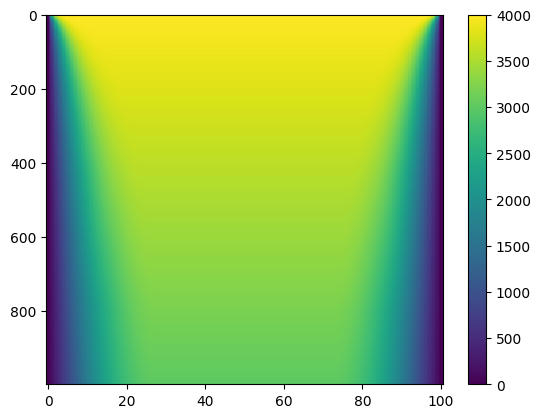

In [36]:
import matplotlib.pyplot as plt

imgplot = plt.imshow(PXX,aspect='auto')
plt.colorbar()


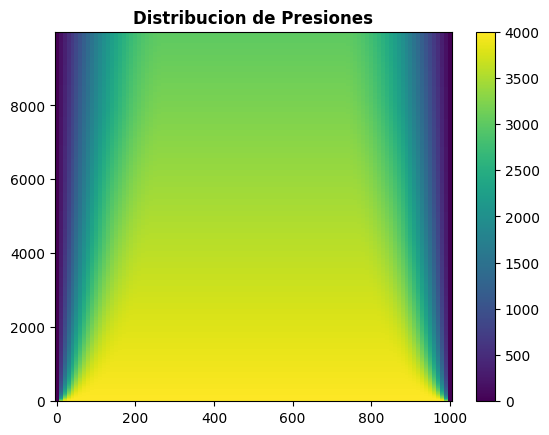

In [37]:
c=plt.pcolormesh(distance,VectorTiempo,PXX)
plt.colorbar(c)

plt.title('Distribucion de Presiones', fontweight="bold")
plt.show()